<a href="https://colab.research.google.com/github/pijuma/Facul/blob/main/Redes_complexas(Aula1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Testes dos comandos das aulas 1 e 2 de redes complexas, francisco, 5o semestre

In [12]:
import networkx as nx

G = nx.Graph() #criar grafo vazio

G.add_node('A') #incluir vértice
G.add_node('B')

G.add_edge('B', 'C')
G.add_edge('C', 'A')
G.add_edge('A', 'B') #criar aresta

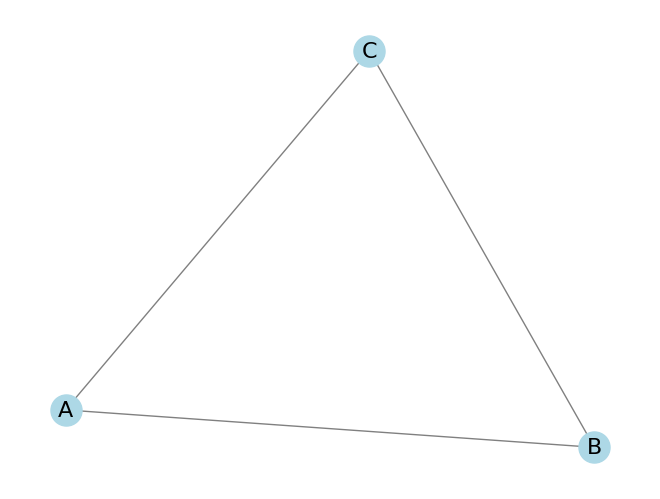

In [13]:
import matplotlib.pyplot as plt

#para "plotar" o grafo
pos=nx.spring_layout(G) #gera o layout em questão de posicionamento
nx.draw(G, with_labels = True, node_color="lightblue", edge_color="gray", node_size=500, font_size=16, pos = pos)
plt.show(True) #pra visualizar de fato

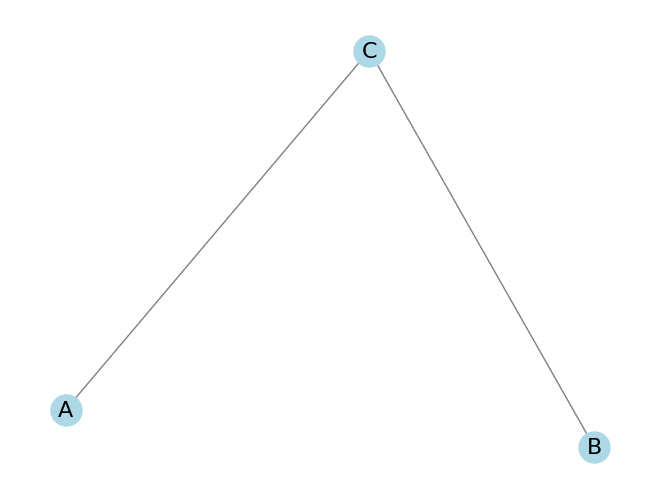

In [14]:
G.remove_edge('A', 'B') #remover aresta
nx.draw(G, with_labels = True, node_color="lightblue", edge_color="gray", node_size=500, font_size=16, pos = pos)
plt.show(True)

In [15]:
#para criar grafos ponderados
Gw = nx.Graph()#criar grafo vazio

Gw.add_edge('a','b',weight=0.1) #adicionar aresta com peso
Gw.add_edge('a','c',weight=0.5)
Gw.add_edge('b','c',weight=0.3)

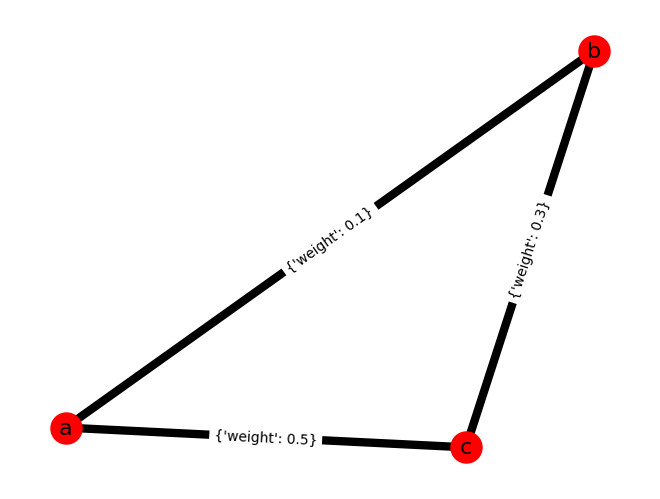

In [16]:
labels = Gw.nodes()
posw=nx.spring_layout(Gw) #definir posicionamento
#desenhar o grafo com width (espessura) fixa etc
nx.draw(Gw, with_labels = True, node_color = 'r', node_size=500,
        font_size=16, pos=posw, width=6)
#serve pra escrever os labels
nx.draw_networkx_edge_labels(Gw,posw)
plt.savefig('graphw.pdf') #salva a imagem em um pdf
plt.show(True)
#se não tiver peso ele ficará {}

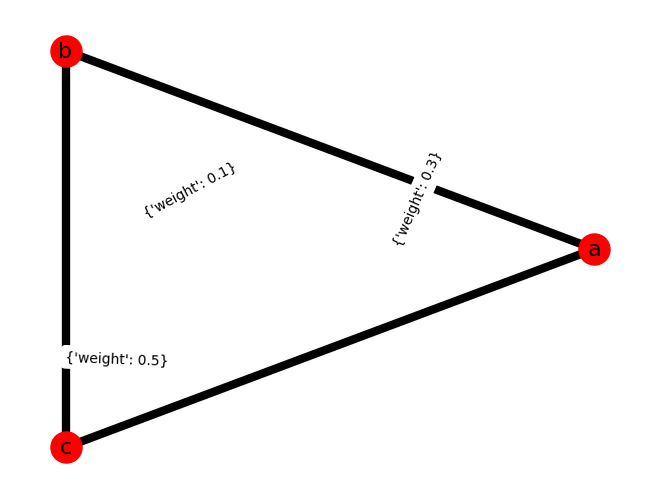

In [17]:
pos=nx.circular_layout(Gw) #outro posicionamento
nx.draw(Gw, with_labels = True, node_color = 'r', node_size=500,
        font_size=16, pos=pos, width=6)
nx.draw_networkx_edge_labels(Gw,posw)
plt.savefig('graphw.pdf') #salva a imagem em um pdf
plt.show(True)

Matris de adjacências e lista de conexões

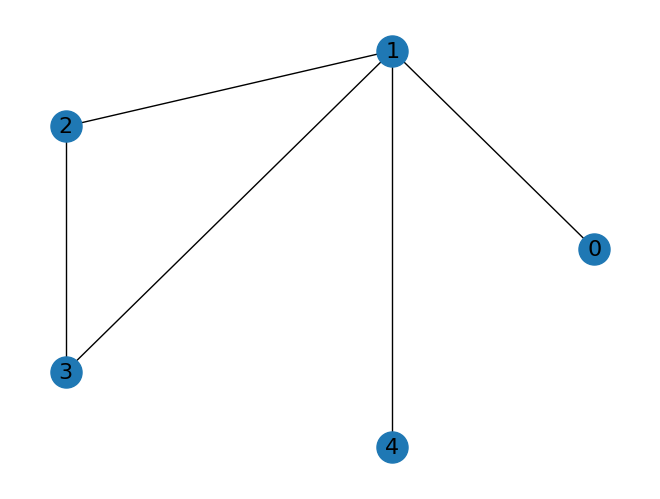

In [18]:
import numpy as np
#criando uma matriz
A = np.array([[0,1,0,0,0],[1,0,1,1,1],[0,1,0,1,0],[0,1,0,0,0],[0,1,0,0,0]])
#montando o grafo a partir da matriz de adj
G = nx.from_numpy_array(A)
pos=nx.circular_layout(G)
nx.draw(G, with_labels = True, node_size=500, font_size=16, pos = pos)
plt.show(True)

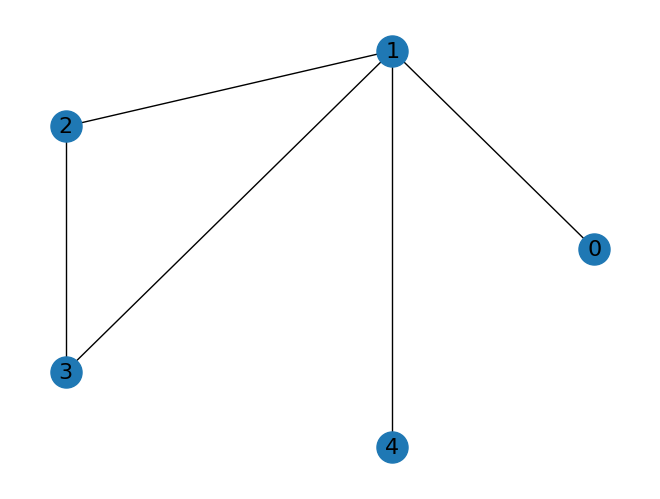

In [19]:
G.clear() #apagar o grafo
#montar um grafo pela lista de arestas
edgelist=[(0,1),(1,2),(2,3), (3,1), (4,1)]
G = nx.Graph(edgelist)
nx.draw(G, with_labels = True, node_size=500, font_size=16, pos = pos)
plt.show(True)

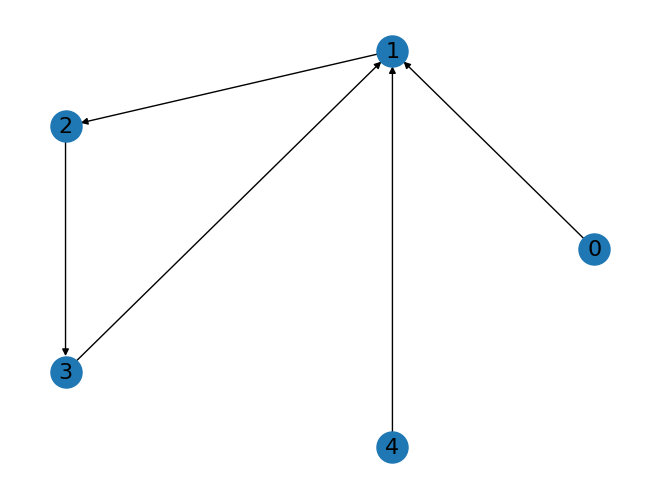

In [20]:
#o grafo pode ser direcionado, nesse caso usamos digrafo
G.clear()
edgelist=[(0,1),(1,2),(2,3), (3,1), (4,1)]
G = nx.DiGraph(edgelist)
nx.draw(G, with_labels = True, node_size=500, font_size=16, pos = pos)
plt.show(True)


Como acessar os vértices, arestas e vizinhos num grafo?

[(1, {'color': 'red', 'weight': 5, 'sla': 'aka'}), (2, {'color': 'blue', 'weight': 10}), (0, {}), (3, {}), (4, {}), (5, {})]
{'color': 'red', 'weight': 5, 'sla': 'aka'}


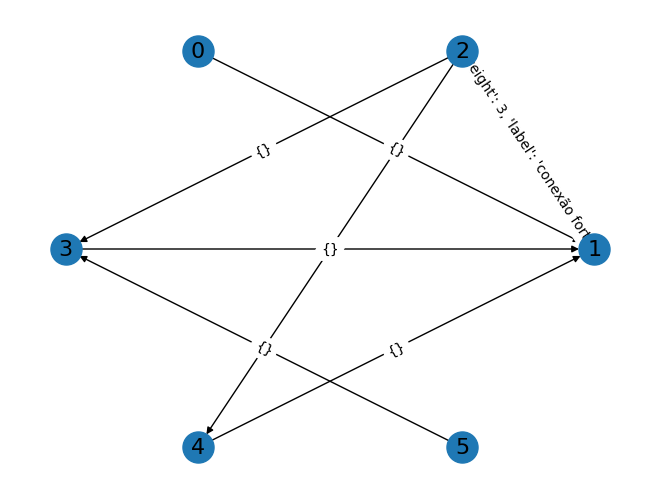

In [25]:
G.clear()

#eu posso criar um atributo com o nome que quiser
G.add_node(1, color="red", weight=5, sla = "aka")
G.add_node(2, color="blue", weight=10)
G.add_edge(1, 2, weight=3, label="conexão forte")

edgelist=[(0,1),(1,2),(2,3), (3,1), (4,1), (5, 3), (2, 4)]

#G = nx.Graph(edgelist) -> perderia os atributos
for i in edgelist:
  G.add_edge(i[0], i[1])
print(G.nodes(data=True)) #mostra tds atributos dos vertices
print(G.nodes[1]) #acessa artibutos de um vertice

#pode fazer:
G.add_edges_from(edgelist)
pos=nx.circular_layout(G)
nx.draw(G, with_labels = True, node_size=500, font_size=16, pos = pos)
nx.draw_networkx_edge_labels(G,pos)
plt.savefig('graphw.pdf') #salva a imagem em um pdf
plt.show(True)

In [28]:
#para acessar uma aresta: vai falar os atributos dela
print(G.edges[1, 2])

#algumas coisas precisam de iterações sobre os vértices:
for node in G.nodes():
  print('Node:', node)

#se os nós não forem inteiros, podemos converter: começa do 0 ou x etc
#G = nx.convert_node_labels_to_integers(G, first_label=0)

#acessando as arestas:
#se colocar data=True ele imprime os labels etc se tiver na aresta
for n1 in G.edges(data=True):
  print(n1)

{'weight': 1.5, 'label': 'conexão forte'}
Node: 1
Node: 2
Node: 0
Node: 3
Node: 4
Node: 5
(1, 2, {'weight': 1.5, 'label': 'conexão forte'})
(2, 3, {'weight': 1.5})
(2, 4, {'weight': 1.5})
(0, 1, {'weight': 1.5})
(3, 1, {'weight': 1.5})
(4, 1, {'weight': 1.5})
(5, 3, {'weight': 1.5})


In [27]:
#adicionando peso em todas arestas
for edge in G.edges():
  G[edge[0]][edge[1]]['weight'] = 1.5

for n1 in G.edges(data=True):
      print(n1)

(1, 2, {'weight': 1.5, 'label': 'conexão forte'})
(2, 3, {'weight': 1.5})
(2, 4, {'weight': 1.5})
(0, 1, {'weight': 1.5})
(3, 1, {'weight': 1.5})
(4, 1, {'weight': 1.5})
(5, 3, {'weight': 1.5})


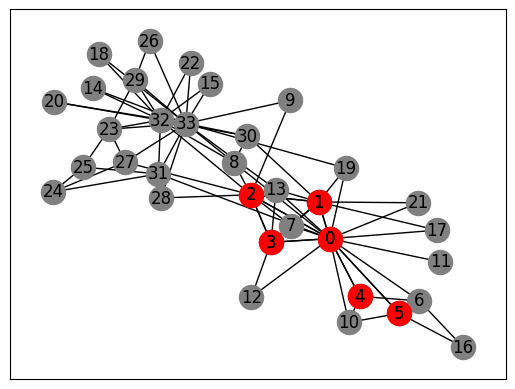

In [29]:
#selecionar um subgrafo da rede do clube de karate
G = nx.karate_club_graph()
subset = [0,1,2,3,4,5]
pos = nx.spring_layout(G)
k = G.subgraph(subset)
#colorir apenas os vérices que estão em subset
nx.draw_networkx(G, pos=pos, node_color = 'gray')
nx.draw_networkx(k, pos=pos, node_color = 'red')
plt.show(True)

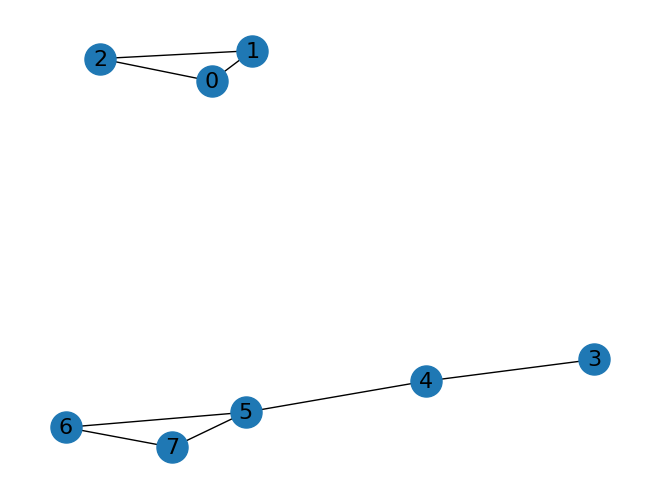

Nodes: [0, 1, 2, 3, 4, 5, 6, 7]
Edges: [(0, 1), (0, 2), (1, 2), (3, 4), (4, 5), (5, 6), (5, 7), (6, 7)]


In [30]:
#podemos juntas dois grafos usando operação de união
G0 = nx.Graph([(0,1),(1,2),(2,0)])
G1 = nx.Graph([(0,1),(1,2),(2,3), (3,4), (2,4)])

G2 = nx.disjoint_union(G0,G1) #vértices 0 de G0 e 0 de G1 são considerados
#diferentes
nx.draw(G2, with_labels = True, node_size=500, font_size=16)
plt.show(True)

print('Nodes:', G2.nodes())
print('Edges:', G2.edges())

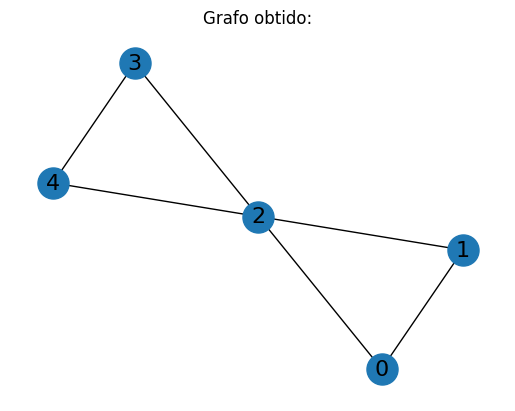

In [31]:
#composição de grafos mas dois vértices 0's são considerados o mesmo
G3 = nx.compose(G1, G0)
plt.title('Grafo obtido:')
nx.draw(G3, with_labels = True, node_size=500, font_size=16)
plt.show(True)

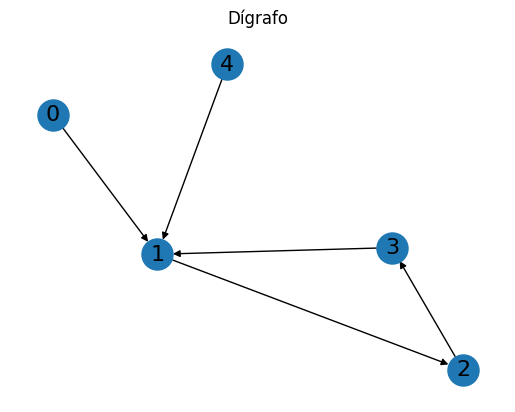

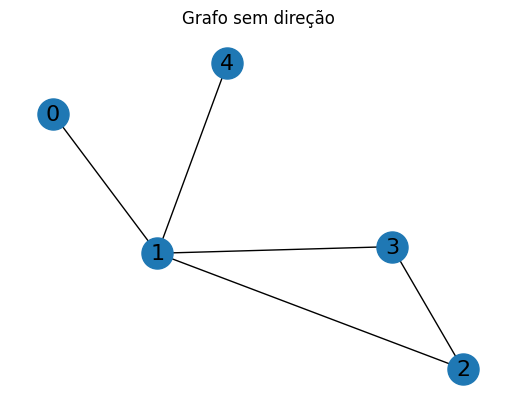

In [32]:
#conversão do grafo
#mudar de dirigido para não dirigido
edgelist=[(0,1),(1,2),(2,3), (3,1), (4,1)]
G = nx.DiGraph(edgelist)
pos=nx.spring_layout(G)
plt.title('Dígrafo')
nx.draw(G, with_labels = True, node_size=500, font_size=16, pos = pos)
plt.show(True)

G = G.to_undirected()
plt.title('Grafo sem direção')
nx.draw(G, with_labels = True, node_size=500, font_size=16, pos = pos)
plt.show(True)

In [ ]:
#ou o contrário:
G = G.to_directed() # converte de n dirigido para dirigido
#vai adicionar ida e volta em todas

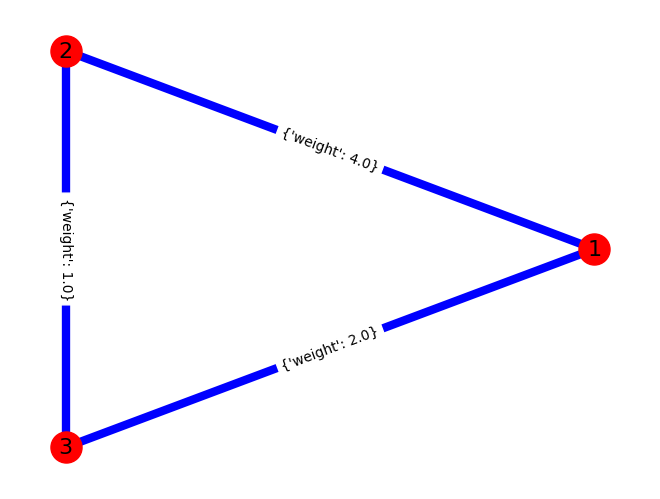

In [33]:
#grafo ponderado em não ponderado:
G1.clear()
G1 = nx.Graph()
G1.add_edge(1, 2, weight=4.0 )
G1.add_edge(1, 3, weight=2.0 )
G1.add_edge(2, 3, weight=1.0 )
labels = G1.nodes()
pos=nx.circular_layout(G1)
nx.draw(G1, with_labels = True, node_color='r', edge_color='b',
        node_size=500, font_size=16, pos=pos, width=6)   # default spring_layout
# use default edge labels
nx.draw_networkx_edge_labels(G1,pos)
plt.show(True)

#precisamos definir um limiar, se o valor estiver abaixo
#nao teremos aresta
min_weight = 1.0
Gnew = nx.Graph()
for (u,v,w) in G1.edges(data=True):
    if w['weight'] > min_weight :
        Gnew.add_edge(u, v)

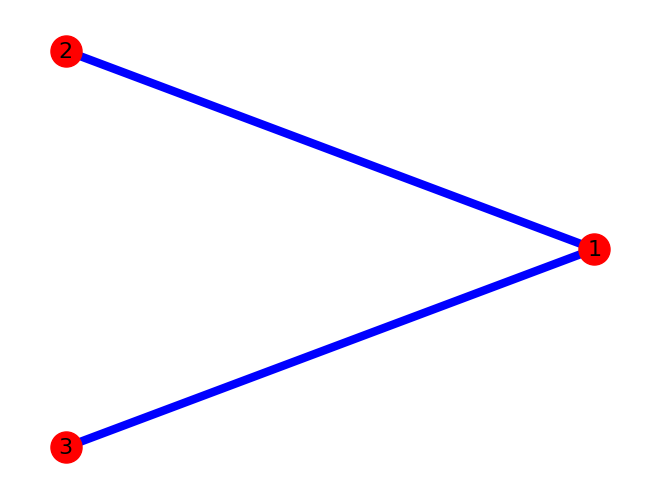

In [34]:
labels = Gnew.nodes()
nx.draw(Gnew, with_labels = True, node_color='r', edge_color='b',
        node_size=500, font_size=16, pos=pos, width=6)   # default spring_layout
plt.show(True)

Leitura e escrita

Para ler uma rede:
g = nx.read_format("path/to/file.txt",...)

Para escrever em um arquivo:
nx.write_format(g, "path/to/file.txt", ...)


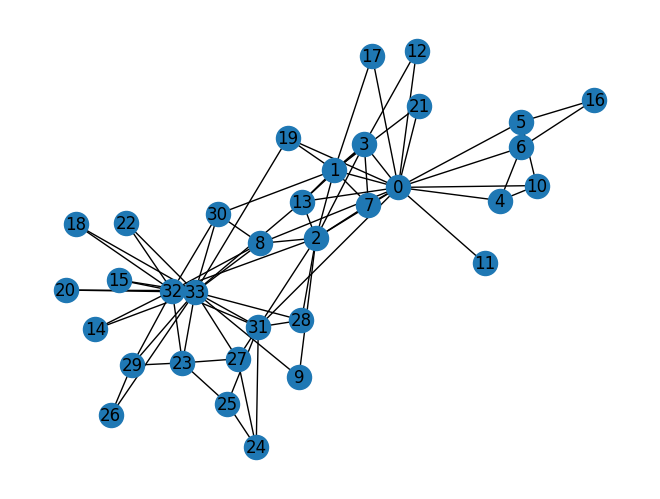

In [35]:
G=nx.karate_club_graph()
nx.draw(G, with_labels = True)
plt.show(True)

#salvando em um arquivo
nx.write_edgelist(G, "zachary.txt")



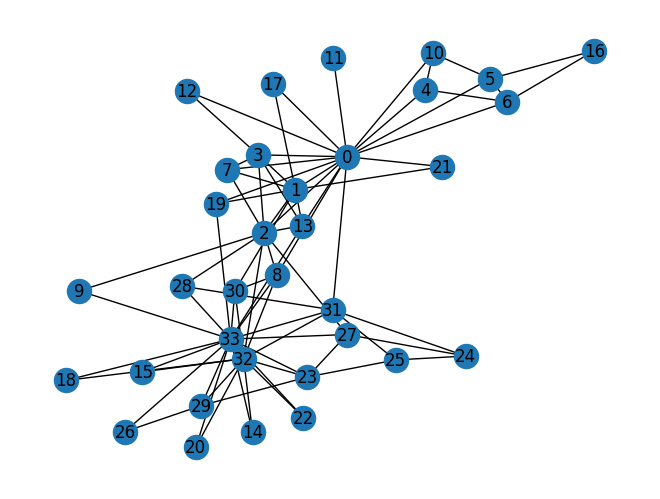

In [36]:
#podemos ler o arquivo e carregar a rede
Gnew = nx.read_edgelist("zachary.txt")
nx.draw(Gnew, with_labels = True)
plt.show(True)

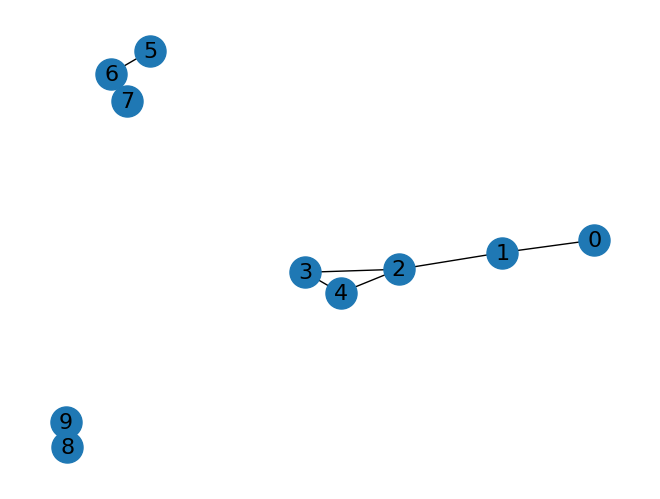

In [38]:
#componentes
G = nx.Graph([(0,1),(1,2),(2,3), (3,4), (2,4), (5,6), (6,7), (8,9)])
pos = nx.fruchterman_reingold_layout(G);
nx.draw(G, with_labels = True, node_size=500, font_size=16, pos = pos)
plt.show(True)


In [37]:
#para obter as componentes:
Gcc = sorted(nx.connected_components(G), key = len, reverse=True)
print(Gcc[0])
#muitas vezes queremos trabalhar apenas com o maior componente
#assim, podemos ordenar e usar Gcc[0]

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}


In [39]:
#podemos ainda remover arestas de uma rede e manter os vértices
import random as random

def remove_node(G, i):
  ng = G.neighbors(i)
  l = []
  for j in ng:
    e = [i, j]
    l.append(e)
  G.remove_edges_from(l)

#gerar um grafo aleatorio de N vertices com prob p de aresta
N = 10
p = 0.2
G = nx.gnp_random_graph(N, p, seed = None, directed=False)
#pegar maior componente
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])
G0 = nx.Graph(G0)

#remover arestas de um nó de forma aleatória
node = random.choice(np.array(G0.nodes()))
# Remover o nó e todas suas arestas
G0.remove_node(node)


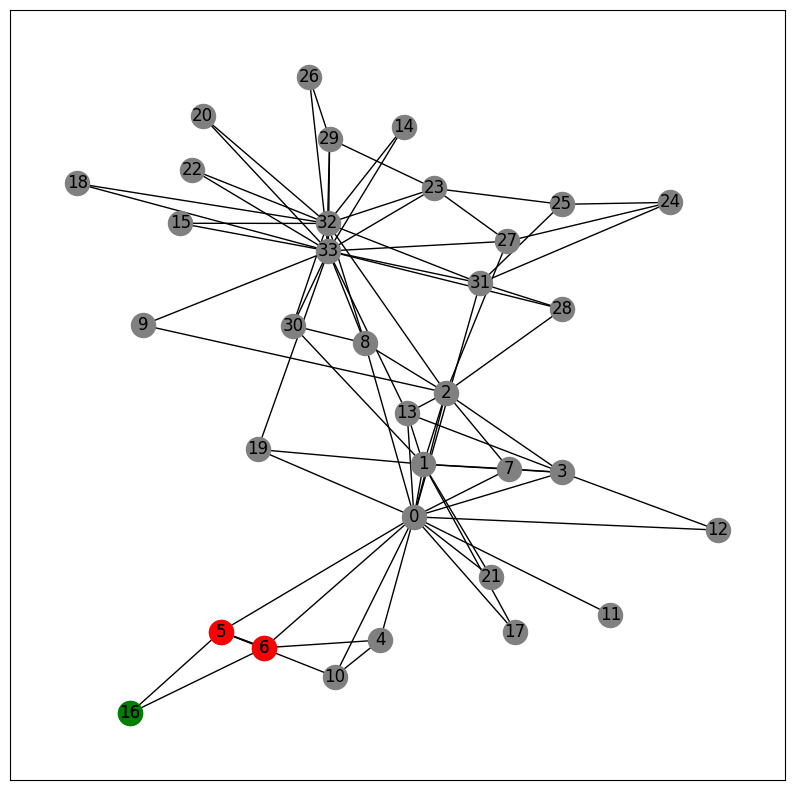

In [40]:
#acesso ao vizinho:
node = 16
G=nx.karate_club_graph()
subset = list(G.neighbors(node))
k = G.subgraph(subset)
nodei = G.subgraph(node)
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos=pos, node_color = 'gray')
nx.draw_networkx(k, pos=pos, node_color = 'red')
nx.draw_networkx(nodei, pos=pos, node_color = 'green')
plt.show(True)

['Myriel', 'Napoleon', 'MlleBaptistine', 'MmeMagloire', 'CountessDeLo', 'Geborand', 'Champtercier', 'Cravatte', 'Count', 'OldMan', 'Labarre', 'Valjean', 'Marguerite', 'MmeDeR', 'Isabeau', 'Gervais', 'Tholomyes', 'Listolier', 'Fameuil', 'Blacheville', 'Favourite', 'Dahlia', 'Zephine', 'Fantine', 'MmeThenardier', 'Thenardier', 'Cosette', 'Javert', 'Fauchelevent', 'Bamatabois', 'Perpetue', 'Simplice', 'Scaufflaire', 'Woman1', 'Judge', 'Champmathieu', 'Brevet', 'Chenildieu', 'Cochepaille', 'Pontmercy', 'Boulatruelle', 'Eponine', 'Anzelma', 'Woman2', 'MotherInnocent', 'Gribier', 'Jondrette', 'MmeBurgon', 'Gavroche', 'Gillenormand', 'Magnon', 'MlleGillenormand', 'MmePontmercy', 'MlleVaubois', 'LtGillenormand', 'Marius', 'BaronessT', 'Mabeuf', 'Enjolras', 'Combeferre', 'Prouvaire', 'Feuilly', 'Courfeyrac', 'Bahorel', 'Bossuet', 'Joly', 'Grantaire', 'MotherPlutarch', 'Gueulemer', 'Babet', 'Claquesous', 'Montparnasse', 'Toussaint', 'Child1', 'Child2', 'Brujon', 'MmeHucheloup']


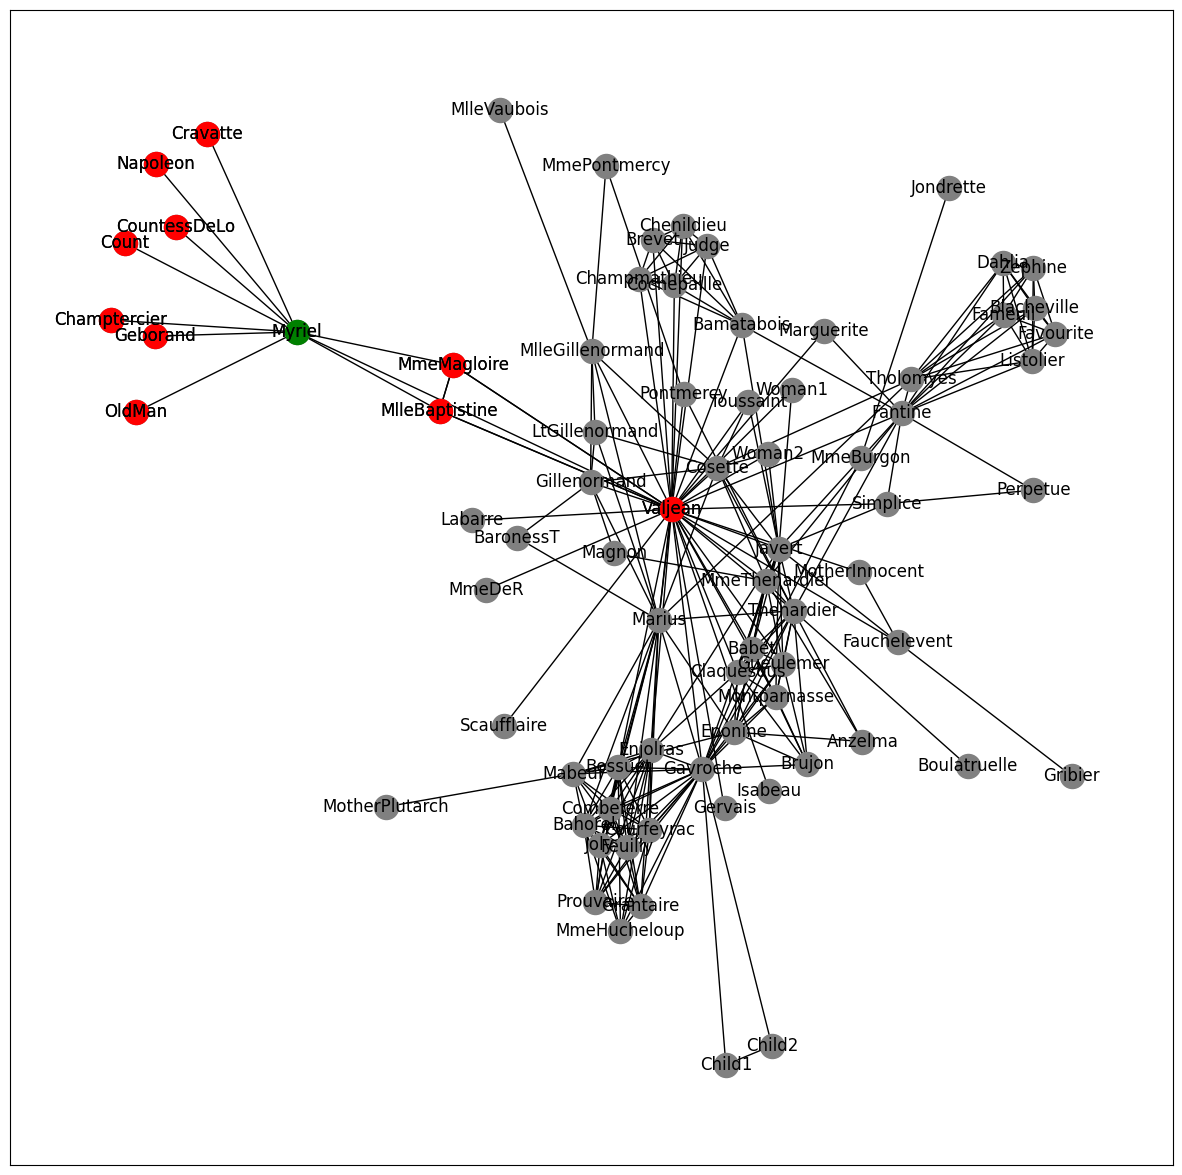

In [43]:
#carregar rede a partir de arquivo:
G = nx.read_gml("/lesmis.gml")
G = G.to_undirected()
print(G.nodes)

subset = list(G.neighbors(list(G.nodes)[0])) # a set of nodes
pos = nx.spring_layout(G)
k = G.subgraph(subset)
nodei = G.subgraph(list(G.nodes)[0])
plt.figure(figsize=(15,15))
nx.draw_networkx(G, pos=pos, node_color = 'gray')
nx.draw_networkx(k, pos=pos, node_color = 'red')
nx.draw_networkx(nodei, pos=pos, node_color = 'green')
plt.show(True)

Caracterização de redes complexas:
grau e transitividade

In [61]:
from numpy  import *
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import math

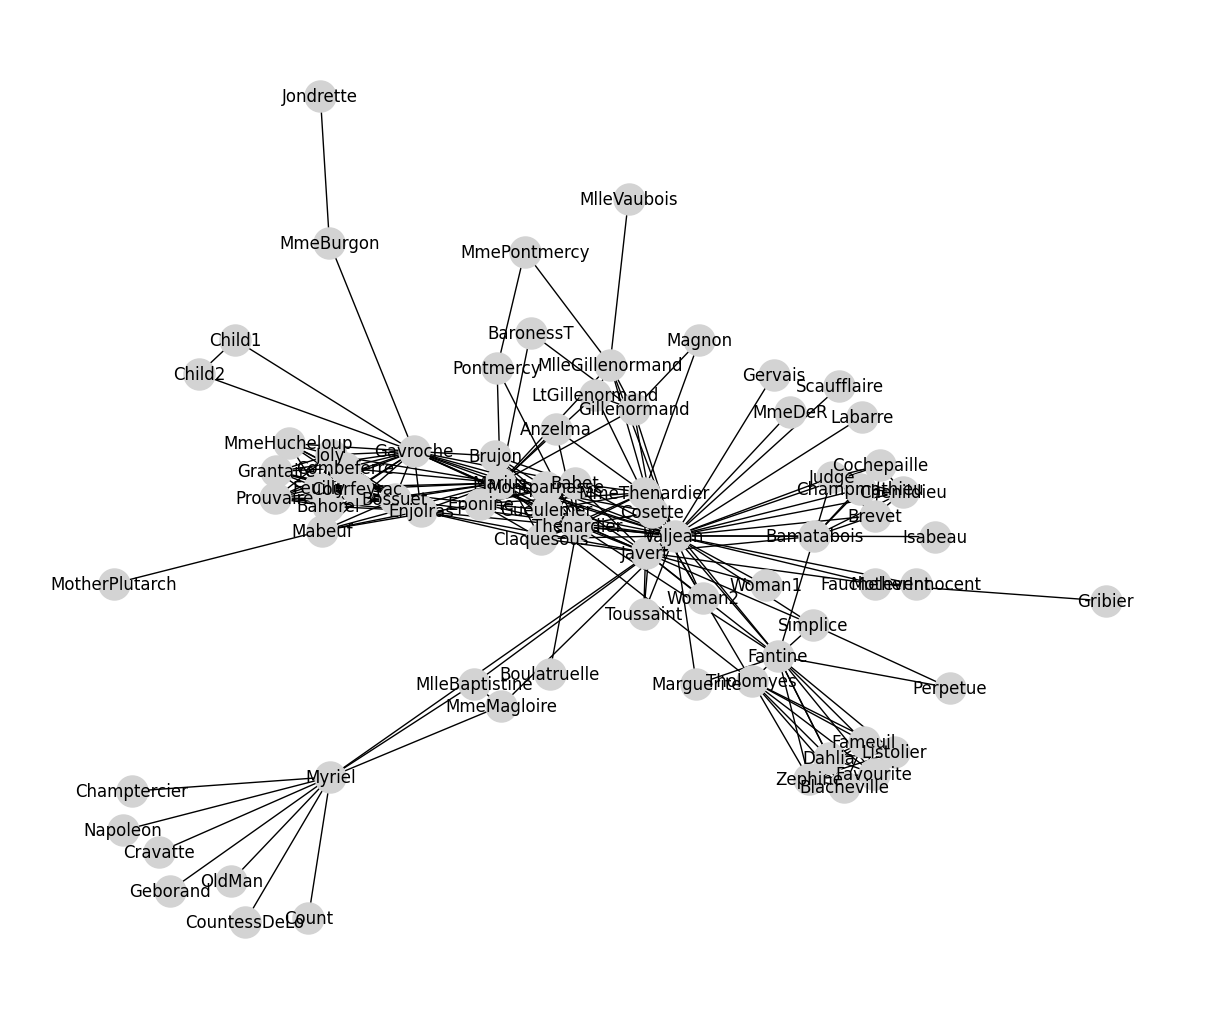

In [45]:
#ler uma rede de um arquivo
#G= nx.read_edgelist("data/lesmis.txt", nodetype=int, data=(('weight',float),))
G= nx.read_gml("/lesmis.gml") # Read the network
# If the data file has only two columns, use this:
#G= G=nx.read_edgelist("data/powergrid.txt", nodetype=int)

plt.figure(figsize=(12,10))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="lightgray", node_size=500, with_labels=True)



In [46]:
#transformando em uma rede sem direção
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))

#selecionar maior componente
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])

#convertendo os labels pra numeros a partir de 0
G = nx.convert_node_labels_to_integers(G, first_label=0)

#numero vertices/arestas
N = len(G)
M = G.number_of_edges()


**Medidas de conectividade**

grau -> número de conexões -> estrutura retornada é do tipo networkx.classes.reportviews.DegreeView, precisamos converter para dictionary do Python e então acessar os valores. Vamos converter para um vetor do numpy para facilitar a sua manipulação.


In [47]:
vk = dict(G.degree()).values()
vk = np.array(list(vk))
print('Degree', vk)


Degree [10  1  3  3  1  1  1  1  1  1  1 36  2  1  1  1  9  7  7  7  7  7  7 15
 11 16 11 17  4  8  2  4  1  2  6  6  6  6  6  3  1 11  3  3  2  1  1  2
 22  7  2  7  2  1  4 19  2 11 15 11  9 11 13 12 13 12 10  1 10 10 10  9
  3  2  2  7  7]


In [48]:
#grau medio da rede:
md = mean(vk)
print(md)

6.597402597402597


Como grau é uma v.a podemos calcular qualquer quantidade estatística para o grau

In [49]:
def momment(G,m):
    M = 0
    N = len(G)
    for i in G.nodes:
        M = M + G.degree(i)**m #probabilidade de i é 1/N
    M = M/N
    return M

print('Primeiro momento de k:', momment(G,1))
print('Segundo momento de k:', momment(G,2))
print('Terceiro momento de k:', momment(G,3))
print('Variância de k:', np.var(vk))
print('Mediana de k:', np.median(vk))


Primeiro momento de k: 6.597402597402597
Segundo momento de k: 79.53246753246754
Terceiro momento de k: 1408.025974025974
Variância de k: 36.006746500253
Mediana de k: 6.0


In [52]:
#podemos calcular a distribuição do grau
def degree_distribution(G):
    vk = dict(G.degree())
    vk = list(vk.values())  # we get only the degree values
    vk = np.array(vk) #fazendo o grau virar um array
    maxk = np.max(vk) #valor max
    mink = np.min(vk) #valor min
    kvalues= np.arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1 #quantos vertices tem o grau k
    Pk = Pk/sum(Pk) # quantidade total de vertices - P(k) tem que somar 1
    return kvalues,Pk

ks, Pk = degree_distribution(G)
print(ks) #quantos vetices de cada grau
print(Pk) #probabilidade de achar valor de grau k

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]
[0.         0.22077922 0.12987013 0.07792208 0.03896104 0.
 0.06493506 0.12987013 0.01298701 0.03896104 0.06493506 0.07792208
 0.02597403 0.02597403 0.         0.02597403 0.01298701 0.01298701
 0.         0.01298701 0.         0.         0.01298701 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.01298701]


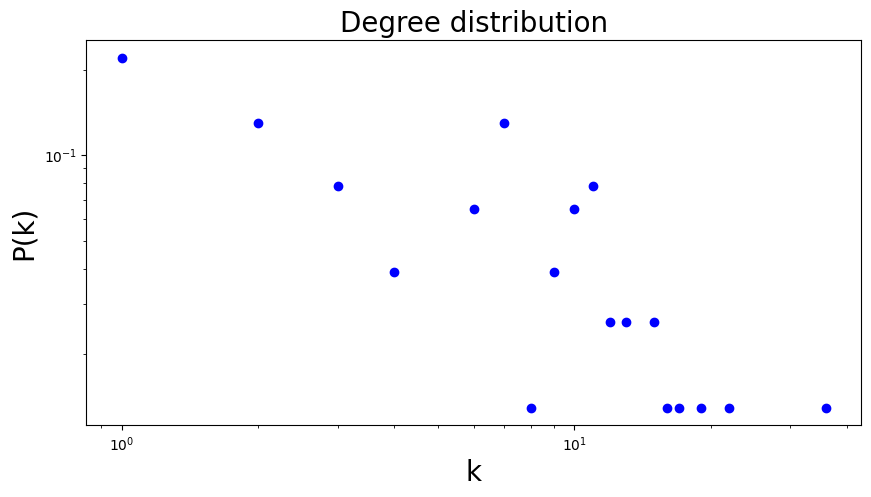

In [56]:
#para apresentar a distribuição na escala log-log:
plt.figure(figsize=(8,5)) #padronizando -> largura x altura
fig = plt.subplot(1,1,1) #escala do grafico
fig.set_xscale('log') #escala log-log
fig.set_yscale('log')
plt.plot(ks,Pk,'bo')
plt.xlabel("k", fontsize=20) #colocando legenda
plt.ylabel("P(k)", fontsize=20)
plt.title("Degree distribution", fontsize=20)
#plt.grid(True)
plt.savefig('degree_dist.eps') #save the figure into a file
plt.show(True)

In [58]:
#podemos calcular os momentos utilizando os valores encontrados na distribuição
def momment_of_degree_distribution(G,m):
    k,Pk = degree_distribution(G)
    M = sum((k**m)*Pk)
    return M

k1 = momment_of_degree_distribution(G, 1)
print("grau medio = ", mean(vk)) ;
print("valor encontrado: ", k1)


grau medio =  6.597402597402597
valor encontrado:  6.5974025974025965


Entropia de shannon

Se a entropia é baixa então os graus são mais similares

H = - ΣP(k)*log2(P(k))

Quanto mais próximo de 0 mais homogenea é a distribuição dos graus

podemos usar a versão normalizada:
Hn = (H/Hmax) em que Hmax = logN

In [64]:
#podemos calcular a heterogeneidade das conexões pela entropia de shannon
def shannon_entropy(G):
    k,Pk = degree_distribution(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H

H = shannon_entropy(G)
print("Shannon Entropy = ", "%3.4f"%H)
Hn = H/math.log(len(G), 2)
print(Hn)

Shannon Entropy =  3.5957
0.5737701673150897


Usando boxplot

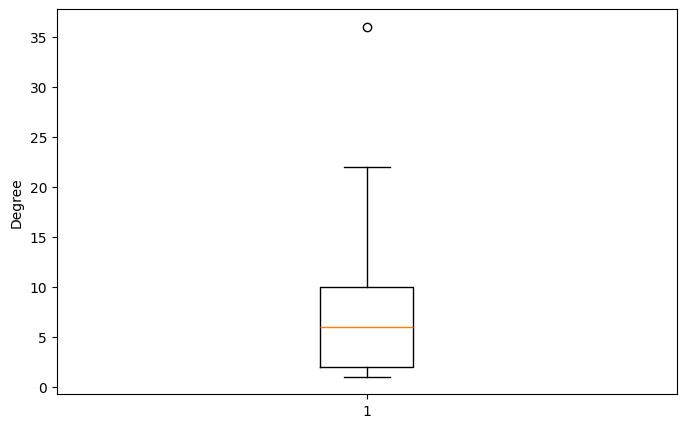

In [66]:
#boxplot dos graus da rede
fig, ax = plt.subplots(figsize=(8,5))
ax.boxplot(vk, vert = 0)
ax.set_ylabel('Degree')
plt.show(True)

Coeficiente de agrupamento e transitividade (clustering global)

A medida de transitividade conta quantos triângulos temos num grafo

Para calcular consideramos 3*n°triangulos/quantidade de triplas

ou seja quantos são de fato triângulo de todos os potenciais

In [67]:
CC = (nx.transitivity(G))
print("Transitivity = ","%3.4f"%CC)

Transitivity =  0.4989


Podemos usar a média do coeficiente de agrupamento calculada a partir do coeficiente local

O clustering coeff local representa quantos vértices são vizinhos meus e estão conectados entre si

ci = (2*ei)÷(ki*(ki-1))

O clustering coef local da peso igual a todos vértices enquanto o global da peso igual a todos triângulos

In [68]:
#calculando clustering local pra cada nó
vcc = []
for i in G.nodes():
    vcc.append(nx.clustering(G, i))
vcc= np.array(vcc)
print('Clustering of all nodes:', vcc)

Clustering of all nodes: [0.06666667 0.         1.         1.         0.         0.
 0.         0.         0.         0.         0.         0.12063492
 1.         0.         0.         0.         0.61111111 1.
 1.         1.         1.         1.         1.         0.31428571
 0.49090909 0.40833333 0.38181818 0.32352941 0.33333333 0.64285714
 1.         0.66666667 0.         1.         1.         1.
 1.         1.         1.         0.33333333 0.         0.45454545
 1.         1.         1.         0.         0.         0.
 0.35497835 0.47619048 0.         0.42857143 0.         0.
 1.         0.33333333 1.         0.69090909 0.60952381 0.92727273
 1.         0.92727273 0.75641026 0.86363636 0.76923077 0.86363636
 0.93333333 0.         0.8        0.8        0.71111111 0.83333333
 1.         1.         1.         0.9047619  1.        ]


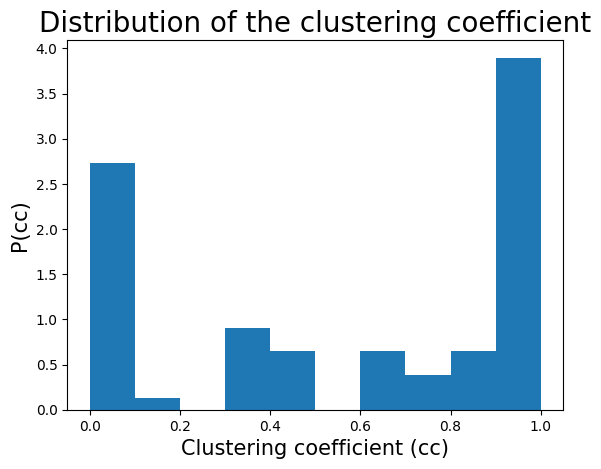

In [69]:
#distribuição de probabilidade do clustering coef
plt.figure()
plt.hist(vcc, bins  = 10, density=True)
plt.title("Distribution of the clustering coefficient", fontsize=20)
plt.ylabel("P(cc)", fontsize=15)
plt.xlabel("Clustering coefficient (cc)", fontsize=15)
#plt.grid(True)
plt.savefig('clustering.eps') #save the figure into a file
plt.show()

Uma rede costuma apresentar coeficiente de agrupamento em função do grau, a rede tem estrutura hierárquica se c(k)~k^(-β)

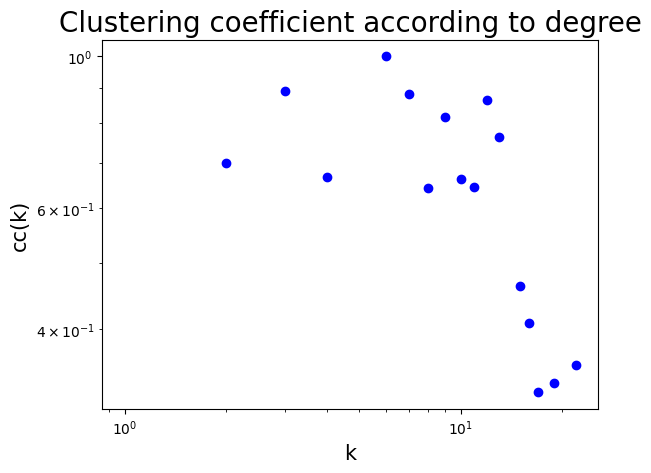

In [70]:
#podemos agrupar os nós que tem mesmo grau e calcular o
#coef médio de clustering deles
ck = list()
ks = list()
for k in np.arange(np.min(vk), np.max(vk)):
    aux = vk == k
    if(len(vcc[aux]) > 0): #tem nó com esse grau?
        cm = mean(vcc[aux]) #average clustering among all the nodes with degree k
        ck.append(cm)
        ks.append(k)
plt.loglog(ks,ck,'bo')
plt.title("Clustering coefficient according to degree", fontsize=20)
plt.ylabel("cc(k)", fontsize=15)
plt.xlabel("k", fontsize=15)
#plt.grid(True)
plt.savefig('cck.eps')
plt.show(True)